In [5]:
import pandas as  pd
import numpy as np

In [7]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Analytics\10days challenge\Day8\manufacturing_dataset.csv")

In [28]:
df.head()

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR),Defect Rate (%),Profit
0,02-01-2024,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407,1.91,90453
1,02-01-2024,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221,16.29,81602
2,02-01-2024,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157,13.50,149572
3,04-01-2024,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059,7.59,82653
4,05-01-2024,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295,5.45,96777


In [11]:
df.shape

(500, 13)

Exploratory Data Analysis (EDA) 

o Trend of production vs. defective units over time.

In [27]:

trend_df=df.groupby("Date") [["Units_Produced","Units_Defective"]].sum().reset_index()
print(trend_df)

           Date  Units_Produced  Units_Defective
0    01-01-2025            3628              297
1    01-02-2025            2050              233
2    01-04-2024             621              114
3    01-05-2024             877               41
4    01-06-2024            1390               36
..          ...             ...              ...
295  31-03-2025            4181              210
296  31-05-2024            3330              231
297  31-07-2024             513                6
298  31-08-2024            1986               43
299  31-12-2024             906               37

[300 rows x 3 columns]


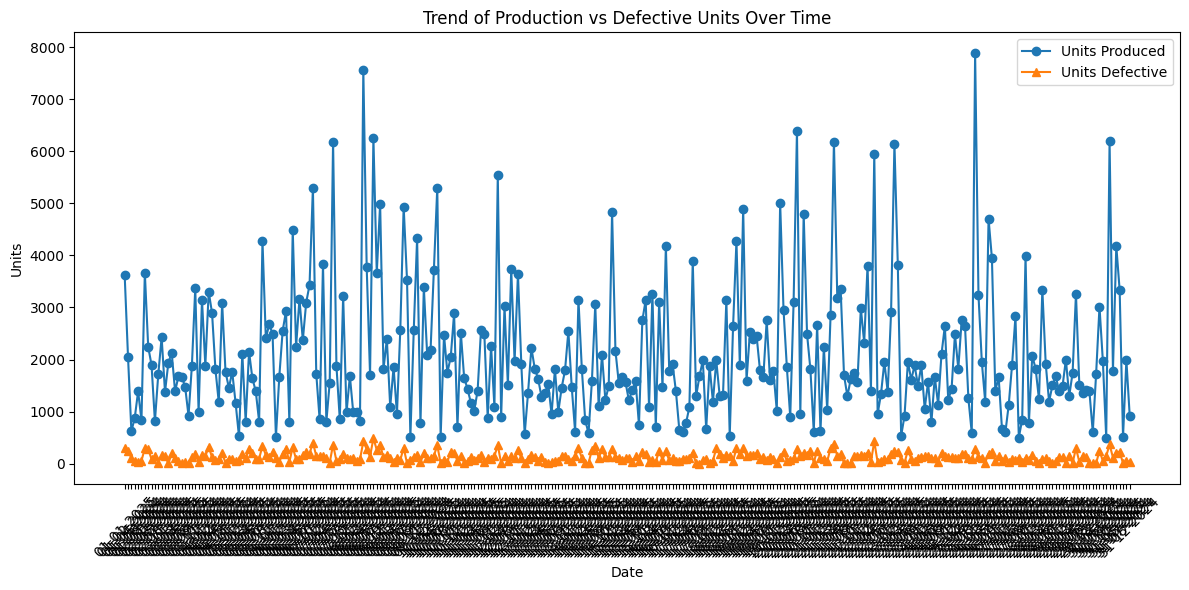

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the trends
plt.figure(figsize=(12,6))
plt.plot(trend_df['Date'], trend_df['Units_Produced'], marker='o', label='Units Produced')
plt.plot(trend_df['Date'], trend_df['Units_Defective'], marker='^', label='Units Defective')

plt.xlabel('Date')
plt.ylabel('Units')
plt.title('Trend of Production vs Defective Units Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

o Compare defect rates across different plants and product categories. 

In [39]:
grouped = df.groupby(['Plant_ID', 'Product_Category'])['Defect Rate (%)'].mean().reset_index()

print(grouped)


   Plant_ID Product_Category  Defect Rate (%)
0   PLANT_A       Automotive         6.852750
1   PLANT_A        Chemicals         9.164318
2   PLANT_A      Electronics         6.534130
3   PLANT_A          Textile         7.211930
4   PLANT_B       Automotive         5.560816
5   PLANT_B        Chemicals         7.933714
6   PLANT_B      Electronics         5.913810
7   PLANT_B          Textile         7.160000
8   PLANT_C       Automotive         6.918710
9   PLANT_C        Chemicals         7.458462
10  PLANT_C      Electronics         6.086000
11  PLANT_C          Textile         7.263824


In [33]:
df.columns

Index(['Date', 'Plant_ID', 'Product_ID', 'Product_Category', 'Units_Produced',
       'Units_Defective', 'Machine_Downtime(hrs)', 'Labor_Hours',
       'Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)',
       'Defect Rate (%)', 'Profit'],
      dtype='object')

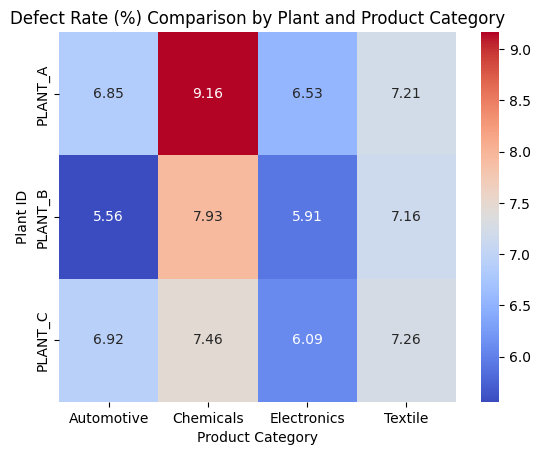

In [46]:
pivot_table = grouped.pivot(index='Plant_ID', columns='Product_Category', values='Defect Rate (%)')

sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Defect Rate (%) Comparison by Plant and Product Category')
plt.ylabel('Plant ID')
plt.xlabel('Product Category')
plt.show()

o Identify the relationship between machine downtime and units produced. 

In [48]:
corr = df['Machine_Downtime(hrs)'].corr(df['Units_Produced'])
print(f"Correlation between Machine Downtime and Units Produced: {corr:.2f}")

Correlation between Machine Downtime and Units Produced: -0.00


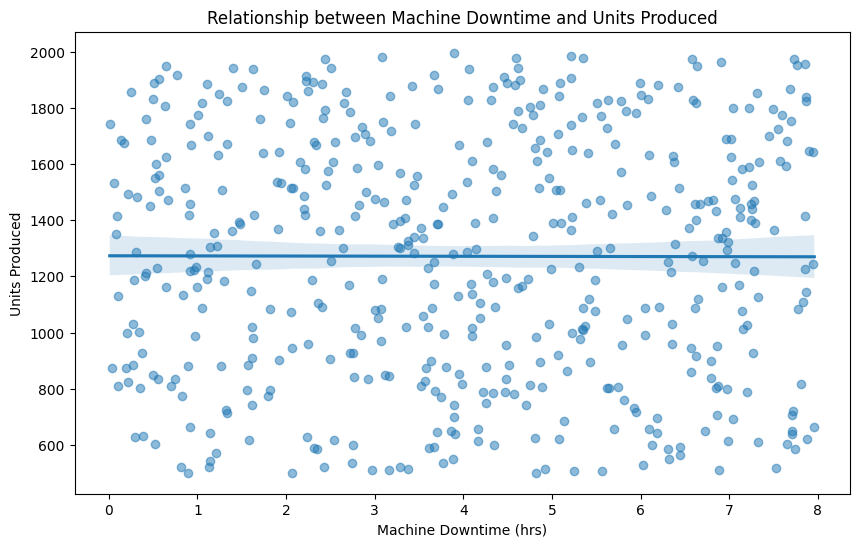

In [49]:
# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Machine_Downtime(hrs)', y='Units_Produced', data=df, scatter_kws={"alpha":0.5})
plt.title('Relationship between Machine Downtime and Units Produced')
plt.xlabel('Machine Downtime (hrs)')
plt.ylabel('Units Produced')
plt.show()

Find top 5 most profitable products. 

In [56]:
Top5_Prod= df.groupby("Product_Category")['Profit'].sum().reset_index()
top5_products = Top5_Prod.sort_values(by='Profit', ascending=False).head(5)

print(top5_products)

  Product_Category    Profit
2      Electronics  11709476
3          Textile  10724542
1        Chemicals  10023250
0       Automotive  10013815


Data Visualization 

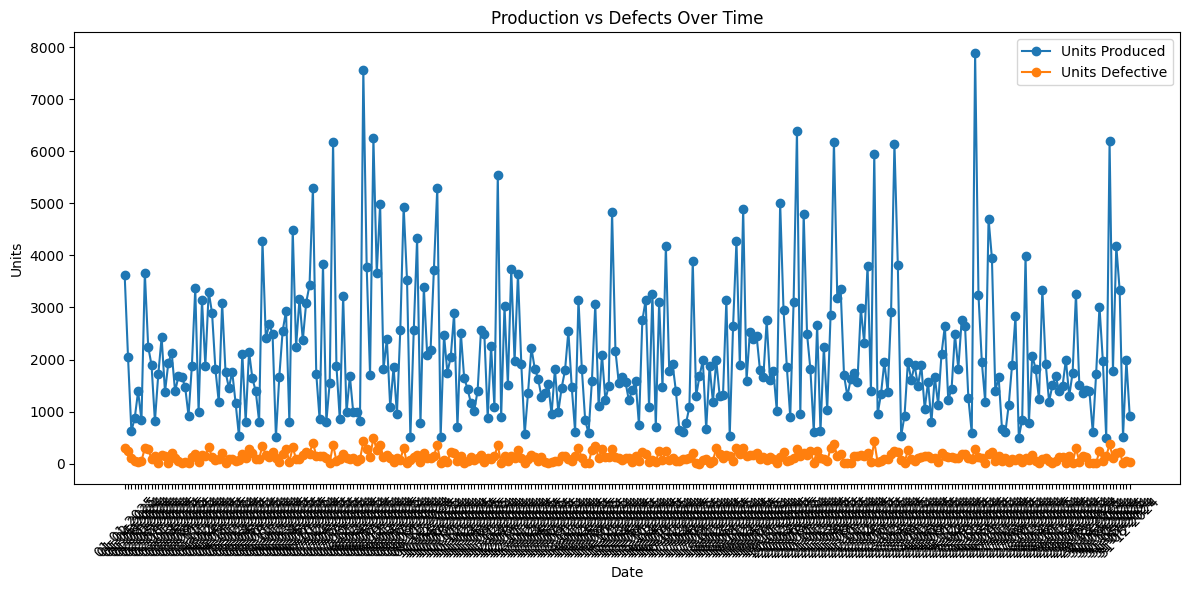

In [57]:

# 1. Line chart: production vs defects over time
trend = df.groupby('Date')[['Units_Produced', 'Units_Defective']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(trend['Date'], trend['Units_Produced'], label='Units Produced', marker='o')
plt.plot(trend['Date'], trend['Units_Defective'], label='Units Defective', marker='o')
plt.title('Production vs Defects Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29228\4076013490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Profit', data=profit_cat, palette='viridis')


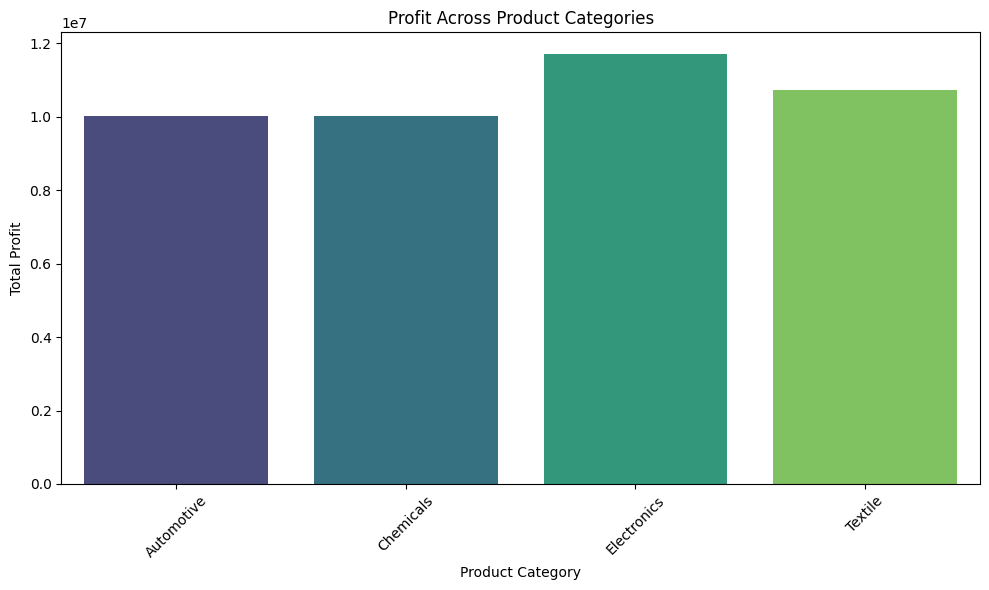

In [58]:
# 2. Bar chart: profit across product categories
profit_cat = df.groupby('Product_Category')['Profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category', y='Profit', data=profit_cat, palette='viridis')
plt.title('Profit Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

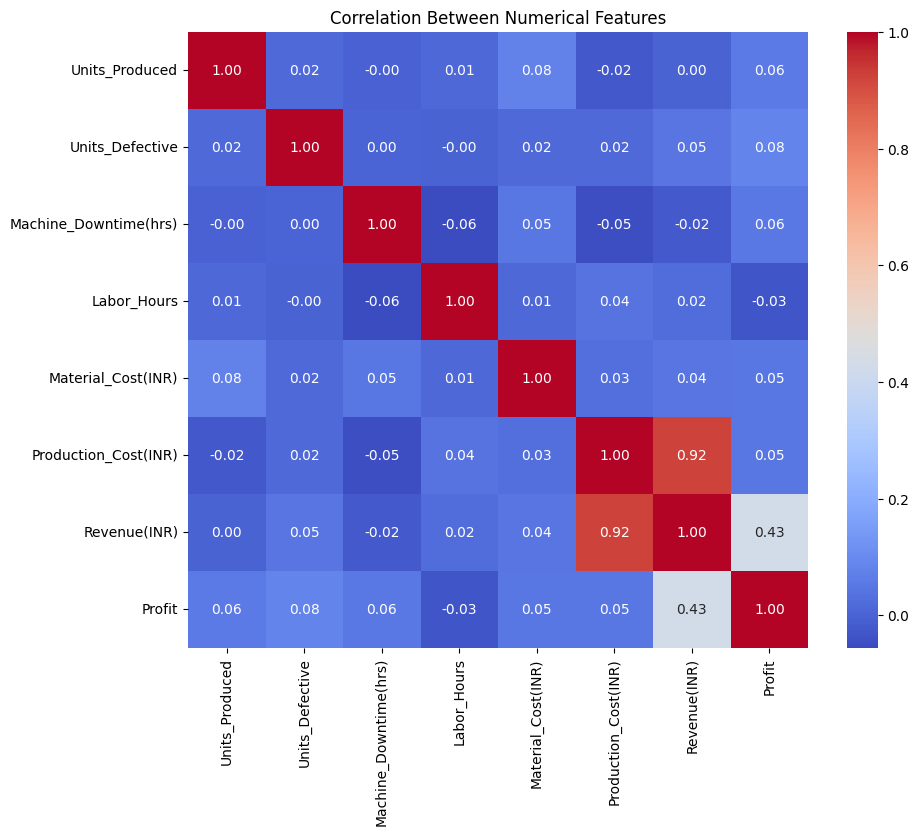

In [59]:
numerical_cols = ['Units_Produced', 'Units_Defective', 'Machine_Downtime(hrs)', 'Labor_Hours', 'Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)', 'Profit']
corr = df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()

In [61]:
df.columns

Index(['Date', 'Plant_ID', 'Product_ID', 'Product_Category', 'Units_Produced',
       'Units_Defective', 'Machine_Downtime(hrs)', 'Labor_Hours',
       'Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)',
       'Defect Rate (%)', 'Profit'],
      dtype='object')

Insights & Recommendations 

In [66]:
#o Which plant has the highest defect rate? 
hdr = df.groupby(['Plant_ID'])['Defect Rate (%)'].mean().reset_index()
hdr=hdr.sort_values(by='Defect Rate (%)', ascending=False)
print(hdr)

  Plant_ID  Defect Rate (%)
0  PLANT_A         7.427754
2  PLANT_C         6.887248
1  PLANT_B         6.528171


In [64]:
#Which product line is the most profitable? 
ppl= df.groupby(['Plant_ID'])['Profit'].mean().reset_index()
ppl['Profit'] = ppl['Profit'].round(2)
ppl = ppl.sort_values(by='Profit', ascending=False)
print(ppl)

  Plant_ID    Profit
1  PLANT_B  87161.37
2  PLANT_C  86664.79
0  PLANT_A  81623.35


In [68]:
# Does higher machine downtime significantly affect production
corr = df['Machine_Downtime(hrs)'].corr(df['Units_Produced'])
print(corr)

-0.002396846401747499


A correlation value of approximately -0.0024 indicates no relationship between machine downtime and units produced in your dataset.

o Suggest strategies to reduce costs and defects. 
1---Analyze production data regularly to detect trends and address issues early.
2---Regular preventive maintenance reduces unexpected breakdowns.
3---Reduce material wastage.
